# Feature Selection using SBS

In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv("wine.data", header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [3]:
df.columns = ["Target","Alcohol","Malic acid","Ash","Alcalinity of ash",
              "Magnesium","Total phenols","Flavanoids","Nonflavanoid phenols",
              "Proanthocyanins","Color intensity","Hue","OD280/OD315 of diluted wines","Proline"]
df

,Target,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
print(df.head(10))

   Target  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0       1    14.23        1.71  2.43               15.6        127   
1       1    13.20        1.78  2.14               11.2        100   
2       1    13.16        2.36  2.67               18.6        101   
3       1    14.37        1.95  2.50               16.8        113   
4       1    13.24        2.59  2.87               21.0        118   
5       1    14.20        1.76  2.45               15.2        112   
6       1    14.39        1.87  2.45               14.6         96   
7       1    14.06        2.15  2.61               17.6        121   
8       1    14.83        1.64  2.17               14.0         97   
9       1    13.86        1.35  2.27               16.0         98   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80

In [5]:
print(df.isnull().sum())

Target                          0
Alcohol                         0
Malic acid                      0
Ash                             0
Alcalinity of ash               0
Magnesium                       0
Total phenols                   0
Flavanoids                      0
Nonflavanoid phenols            0
Proanthocyanins                 0
Color intensity                 0
Hue                             0
OD280/OD315 of diluted wines    0
Proline                         0
dtype: int64


In [6]:
y = df["Target"]
X = df.iloc[:,1:]

In [7]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_std = sc.fit_transform(X)
X_std

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

In [8]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X_std,y,test_size = 0.3, random_state = 10)
print(X_train.shape)
print(X_test.shape)
print(X_train)
print(X_test)

(124, 13)
(54, 13)
[[ 0.49334262  1.41260912  0.41481959 ... -1.12951789 -1.48544548
   0.0098934 ]
 [-1.13720713 -1.08289442  0.52447981 ...  1.54675873  0.15298819
  -0.37224585]
 [ 0.19687903  0.02123125  1.10933436 ...  0.31830389  0.78858745
   1.39514818]
 ...
 [ 0.77745356 -0.47248348  1.21899459 ...  1.41513857  0.37897904
   1.79320989]
 [-1.14955978 -0.15830138 -0.7183361  ... -0.42754369  0.94395616
  -1.17473827]
 [ 1.0615645  -0.88540853 -0.352802   ...  0.23055711  1.32531572
   0.94931905]]
[[-9.76622688e-01 -1.02903463e+00 -2.25357928e+00 -8.09251184e-01
   3.59902539e+00 -7.13217576e-01 -7.52241808e-01 -1.78765596e+00
   1.59282165e+00 -9.55153403e-01  1.41513857e+00  6.47343173e-01
  -9.20104005e-02]
 [-1.45837602e+00 -5.53273167e-01 -1.77838496e+00  1.51829490e-03
  -9.64841748e-01  3.28297930e-01 -3.90813788e-01  6.56394314e-02
  -2.99429209e-01 -1.29688369e+00 -7.65565958e-02 -2.42495800e-01
  -1.05691200e+00]
 [ 1.30861750e+00 -6.34062850e-01 -3.16248596e-01 -1.04

### Ques - WAP to implement sequential backward selection(SBS) on wine dataset

In [9]:
from sklearn.base import clone
from itertools import combinations
from sklearn.metrics import accuracy_score


In [10]:
class SBS():
    def __init__(self, estimator, k_features,scoring=accuracy_score,
        test_size=0.25, random_state=1):
        self.scoring = scoring
        self.estimator = clone(estimator)
        self.k_features = k_features
        self.test_size = test_size
        self.random_state = random_state
    def fit(self, X, y):
        X_train, X_test, y_train, y_test =train_test_split(X, y, 
                    test_size=self.test_size, random_state=self.random_state)
        dim = X_train.shape[1]
        self.indices_ = tuple(range(dim))
        self.subsets_ = [self.indices_]
        score = self._calc_score(X_train, y_train, 
                                 X_test, y_test, self.indices_)
        self.scores_ = [score]
        while dim > self.k_features:
            scores = []
            subsets = []
            for p in combinations(self.indices_, r=dim-1):
                score = self._calc_score(X_train, y_train, 
                                         X_test, y_test, p)
                scores.append(score)
                subsets.append(p)
            best = np.argmax(scores)
            self.indices_ = subsets[best]
            self.subsets_.append(self.indices_)
            dim -= 1
            self.scores_.append(scores[best])
        self.k_score_ = self.scores_[-1]
        return self
    def transform(self, X):
        return X[:, self.indices_]
    def _calc_score(self, X_train, y_train, 
                          X_test, y_test, indices):
        self.estimator.fit(X_train[:, indices], y_train)
        y_pred = self.estimator.predict(X_test[:, indices])
        score = self.scoring(y_test, y_pred)
        return score


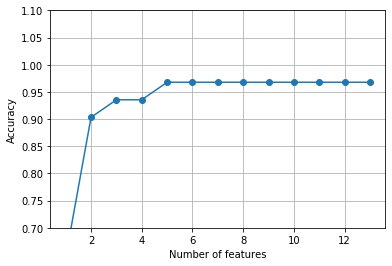

[(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12), (0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11), (0, 1, 2, 3, 4, 5, 6, 7, 9, 10, 11), (0, 1, 2, 3, 4, 5, 6, 9, 10, 11), (0, 1, 2, 3, 4, 5, 6, 9, 10), (0, 1, 2, 3, 4, 5, 6, 9), (0, 1, 2, 3, 4, 5, 9), (0, 1, 2, 3, 5, 9), (0, 2, 3, 5, 9), (0, 3, 5, 9), (0, 5, 9), (5, 9), (5,)] 


[0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.967741935483871, 0.9354838709677419, 0.9354838709677419, 0.9032258064516129, 0.6451612903225806]


In [11]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=2)
sbs = SBS(knn, k_features=1)
sbs.fit(X_train, y_train)
import matplotlib.pyplot as plt
k_feat = [len(k) for k in sbs.subsets_]
plt.plot(k_feat, sbs.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Number of features')
plt.grid()
plt.show()
print(sbs.subsets_,"\n\n")
print(sbs.scores_)


In [12]:
tuple(range(13))

(0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12)